# Perform Manders's colocalization of MSSR ROI images
It runs over the data created with the oib2ome-zarr.ipynb

## Install Libraries

In [1]:
!pip install ome-zarr
!pip install PyQt5
!pip install napari[all]
!pip install git+https://github.com/RoccoDAnt/napari-superres.git

  Using cached ome_zarr-0.9.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached aiohttp-3.10.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.6 kB)
  Using cached zarr-2.18.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached aiohappyeyeballs-2.4.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.5.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached multidict-6.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
  Using cached yarl-1.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (64 kB)
  Using cached s3fs-2024.10.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached asciitree-0.3.3-py3-none-any.whl
  Using cached numcodecs-0.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.9 kB)
  Using cached fasteners-0.19-py3-none-any.whl

## Import libraries

In [9]:
import zarr
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gaussian
from napari_superres.core_mssr import mssr_class
mssr_instance = mssr_class()

## Define File Paths

In [3]:
directory_path = '/home/jovyan/LNMA/bravoa/data/New2 Fig para colocalizacion Manders-Mito'
ome_zarr_name = '1-Cry11 2mg 2h MitoT 750nM 60xmed-post 3.5 Z copy.zarr'
ome_zarr_path = os.path.join(directory_path, ome_zarr_name)
ome_zarr_path

'/home/jovyan/LNMA/bravoa/data/New2 Fig para colocalizacion Manders-Mito/1-Cry11 2mg 2h MitoT 750nM 60xmed-post 3.5 Z copy.zarr'

## Define Parameters

In [4]:
# folder_path = wd + 'New Fig para colocalizacion Manders-Mito'
# order_types = ['Cit']
ch_m1 = 1
ch_m2 = 2
# nameForPDFs = 'Toxin_vs_Mito'


### Parameters for MSSR

fwhm = 8  # Full Width at Half Maximum
amp = 1  # Amplitude
order = 1  # Order
mesh = True  # Optional, default is True
ftI = False  # Optional, default is False
intNorm = True  # Optional, default is True
sigma = 2 # For the Gassian filter
visualization_percentiles=(2.5, 97.5)

## Define Functions

In [10]:
# Extract the rectangular region from the specified channel
def extract_rect_roi(image, left, top, width, height):
    return image[top:top+height, left:left+width]

def manders_colocalization(image1, image2):
    overlap = np.logical_and(image1 > 0, image2 > 0)
    m1 = np.sum(overlap) / np.sum(image1 > 0) if np.sum(image1 > 0) > 0 else 0
    m2 = np.sum(overlap) / np.sum(image2 > 0) if np.sum(image2 > 0) > 0 else 0
    return m1, m2
    
def normalize_channel(channel, lower_percentile, upper_percentile):
    lower_bound = np.percentile(channel, lower_percentile)
    upper_bound = np.percentile(channel, upper_percentile)
    channel = np.clip(channel, lower_bound, upper_bound)
    # Avoid division by zero
    if upper_bound == lower_bound:
        return np.zeros_like(channel)
    return (channel - lower_bound) / (upper_bound - lower_bound)

## Load the OME-Zarr file

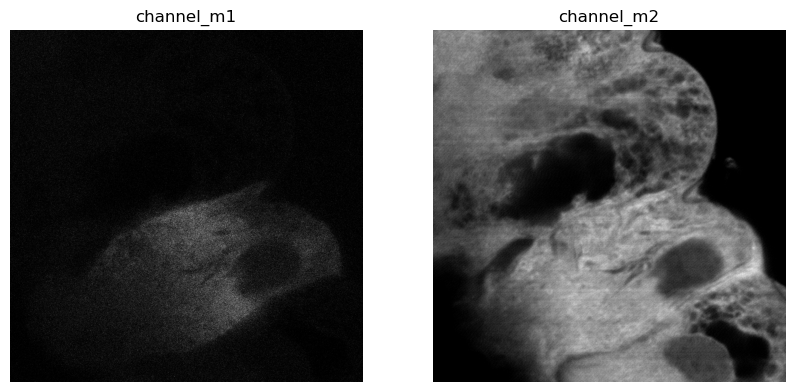

In [6]:
images = zarr.open(ome_zarr_path, mode="r")
channel_m1 = images["image_data"][0, ch_m1, 0, :, :].astype(np.float32)
channel_m2 = images["image_data"][0, ch_m2, 0, :, :].astype(np.float32)

# Set up the figure with two subplots
plt.figure(figsize=(10, 5))

# Display the first image
plt.subplot(1, 2, 1)
plt.title("channel_m1")
plt.imshow(channel_m1, cmap="gray")
plt.axis('off')

# Display the second image
plt.subplot(1, 2, 2)
plt.title("channel_m2")
plt.imshow(channel_m2, cmap="gray")
plt.axis('off')

# Show the figure
plt.show()

## Extract ROI metadata from the OME-Zarr file

In [7]:
roi_metadata = images.attrs.get("roi_metadata", {})
# Assuming roi_metadata is a list of dictionaries with each ROI's information
roi_names = [roi.get('name') for roi in roi_metadata]

# Print all ROI names
for i, roi_name in enumerate(roi_names):
    print(f"ROI {i} Name:", roi_name)

ROI 0 Name: 0003-0616-0452-CitVerde-Mito
ROI 1 Name: 0003-0572-0546-CitVerde-Mito
ROI 2 Name: 0003-0660-0562-CitVerde-Mito
ROI 3 Name: 0003-0806-0550-CitVerde-Mito
ROI 4 Name: 0003-0802-0620-CitVerde-Mito
ROI 5 Name: 0003-0866-0592-CitVerde-Mito
ROI 6 Name: 0002-0688-0708-NucleoVerde-Mito
ROI 7 Name: 0002-0744-0706-NucleoVerde-Mito
ROI 8 Name: 0002-0726-0466-CitVerde-Mito
ROI 9 Name: 0001-0804-0472-CitVerde-Mito


## Process each .roi file

progress: 100%|██████████| 9/9 [00:00<00:00, 1807.20it/s]


ROI Name: 0003-0616-0452-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.518, M2 = 0.54


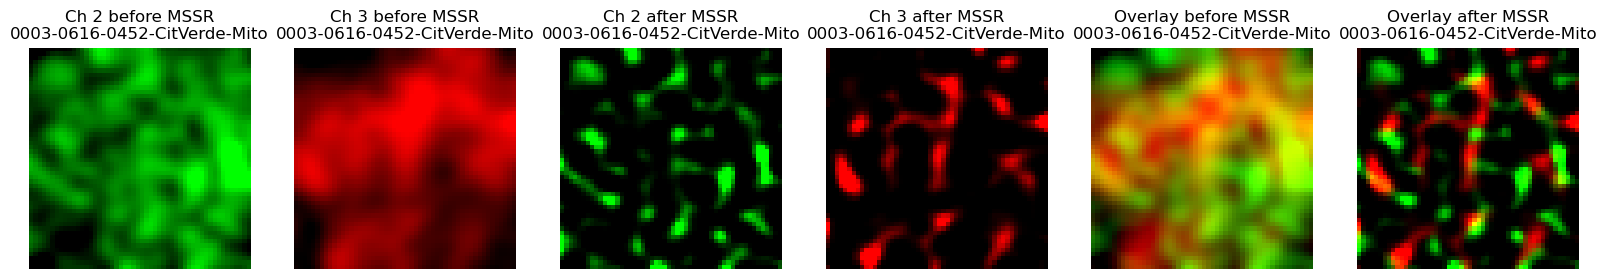

progress: 100%|██████████| 9/9 [00:00<00:00, 2173.72it/s]


ROI Name: 0003-0572-0546-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.527, M2 = 0.54


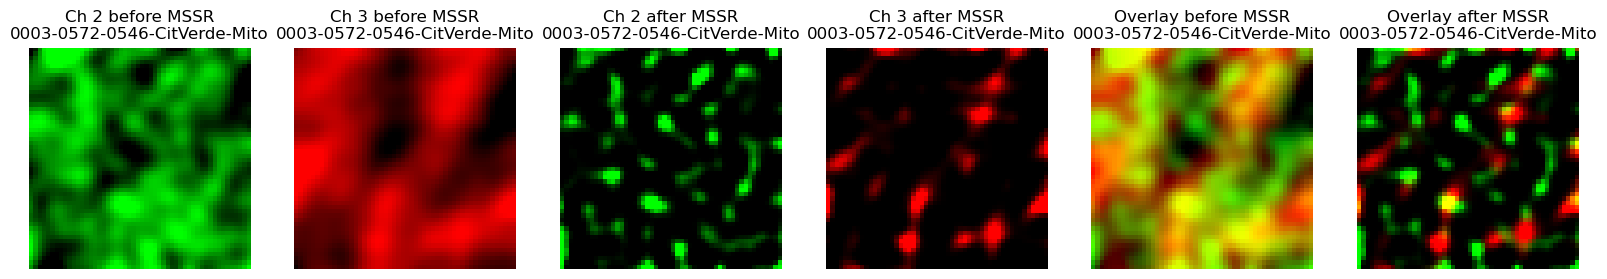

progress: 100%|██████████| 9/9 [00:00<00:00, 2678.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ROI Name: 0003-0660-0562-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.505, M2 = 0.503


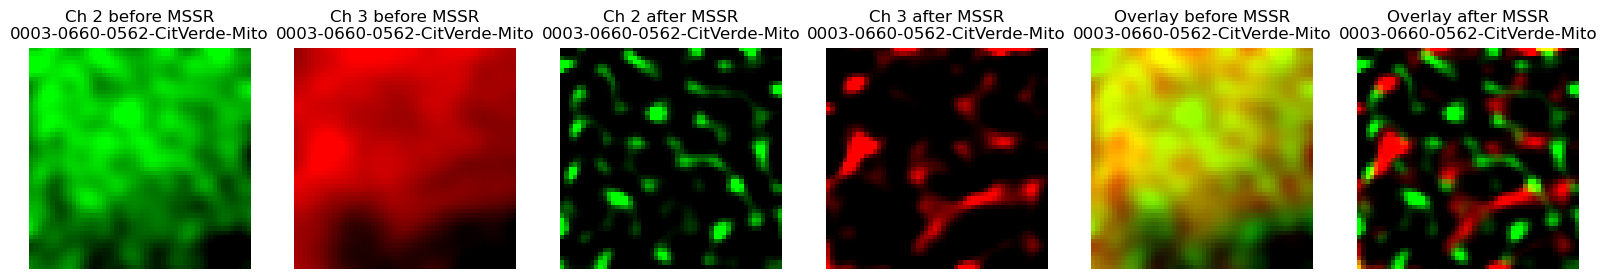

progress: 100%|██████████| 9/9 [00:00<00:00, 2815.81it/s]


ROI Name: 0003-0806-0550-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.505, M2 = 0.498


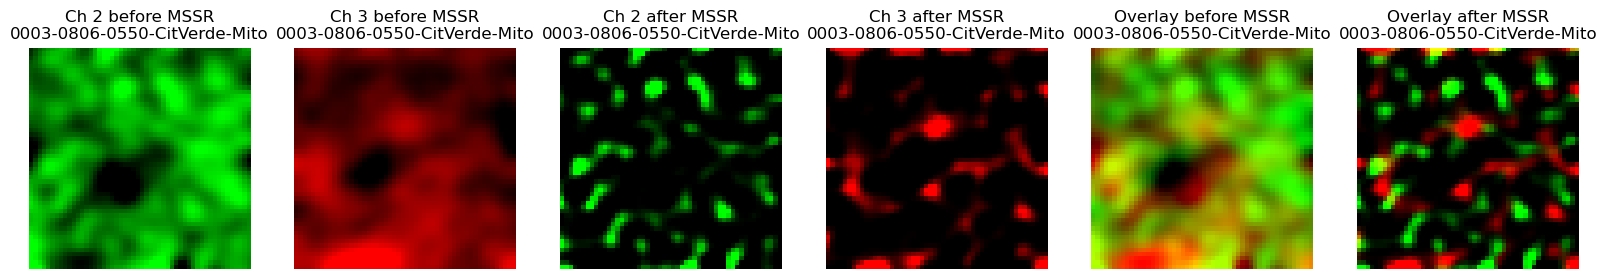

progress: 100%|██████████| 9/9 [00:00<00:00, 2483.63it/s]


ROI Name: 0003-0802-0620-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.495, M2 = 0.485


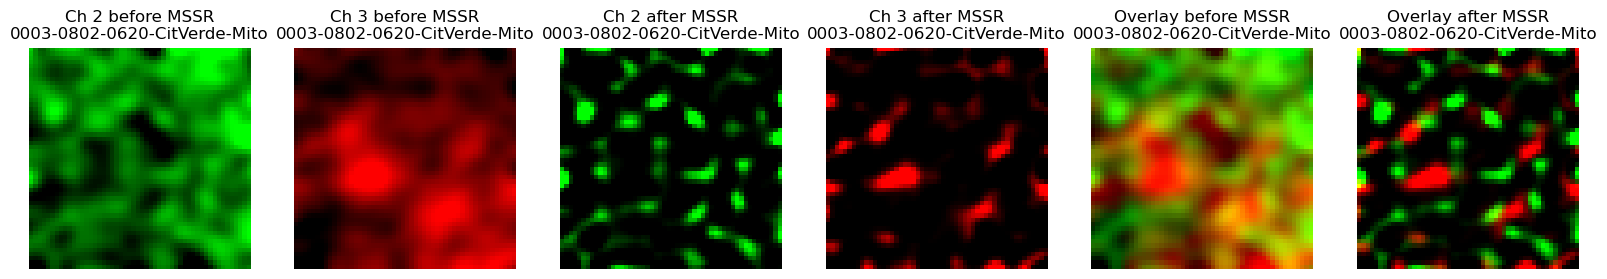

progress: 100%|██████████| 9/9 [00:00<00:00, 2695.95it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ROI Name: 0003-0866-0592-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.543, M2 = 0.533


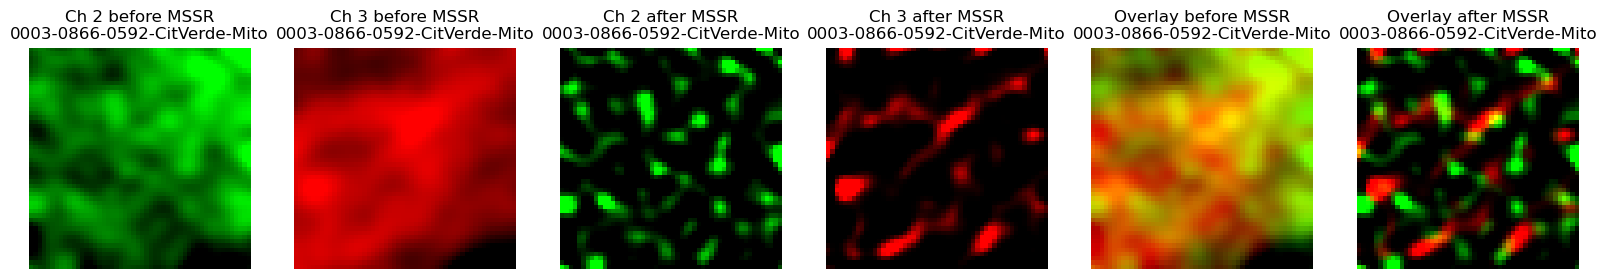

progress: 100%|██████████| 9/9 [00:00<00:00, 2184.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ROI Name: 0002-0688-0708-NucleoVerde-Mito
Manders' colocalization coefficients M1 = 0.519, M2 = 0.534


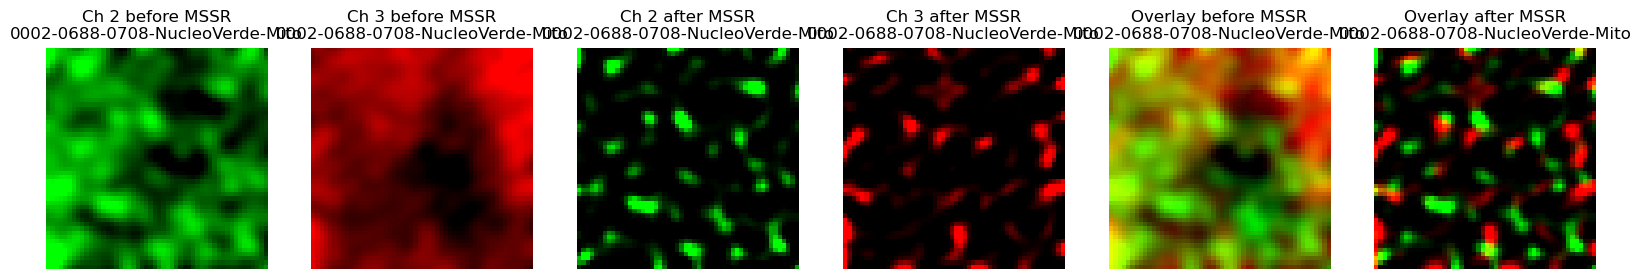

progress: 100%|██████████| 9/9 [00:00<00:00, 1504.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ROI Name: 0002-0744-0706-NucleoVerde-Mito
Manders' colocalization coefficients M1 = 0.518, M2 = 0.505


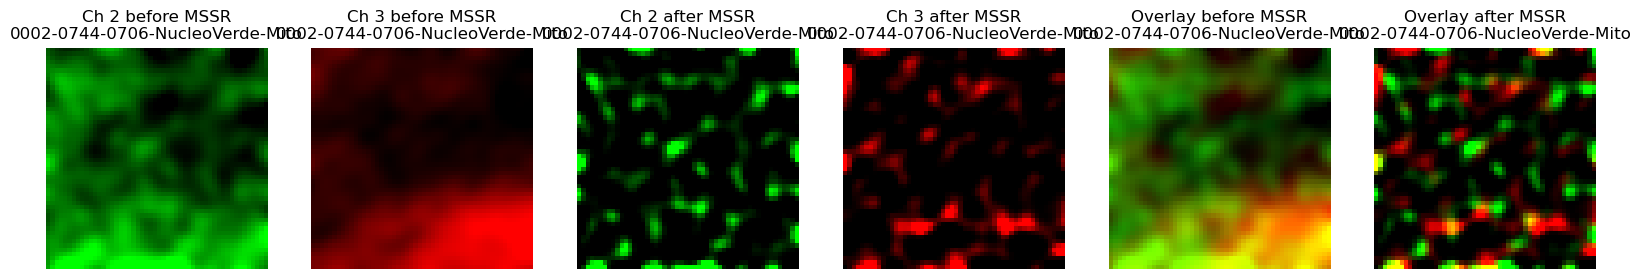

progress: 100%|██████████| 9/9 [00:00<00:00, 2758.60it/s]


ROI Name: 0002-0726-0466-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.47, M2 = 0.464


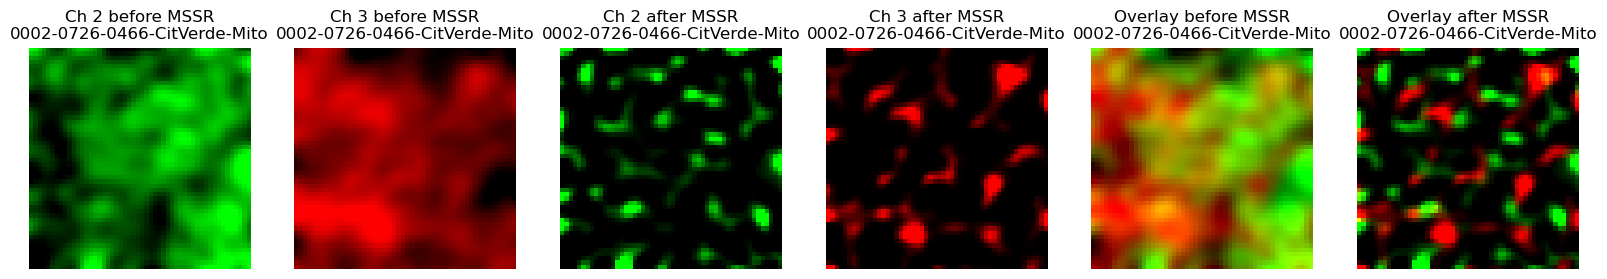

progress: 100%|██████████| 9/9 [00:00<00:00, 2824.87it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ROI Name: 0001-0804-0472-CitVerde-Mito
Manders' colocalization coefficients M1 = 0.551, M2 = 0.545


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


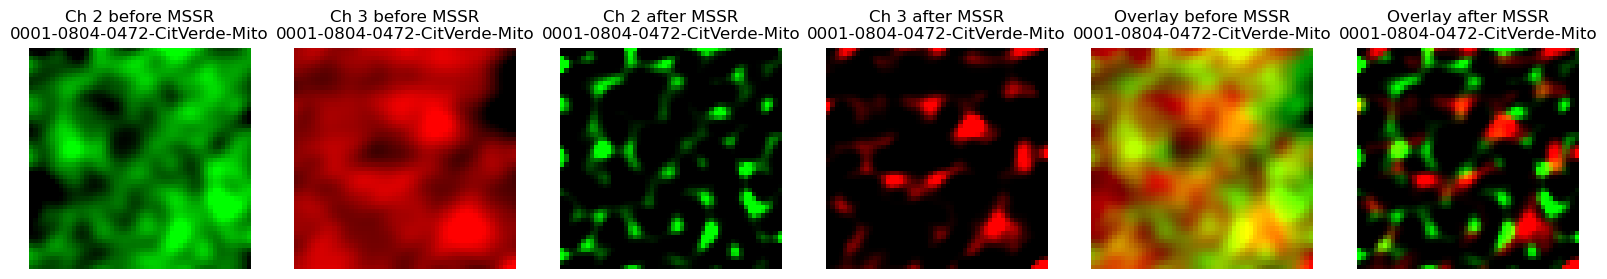

In [17]:
M = []

for roi_info in roi_metadata:

    left = roi_info['left']
    top = roi_info['top']
    width = roi_info['width']
    height = roi_info['height']

    # Extract ROIs
    roi_channel_m1 = extract_rect_roi(channel_m1, left, top, width, height)
    roi_channel_m2 = extract_rect_roi(channel_m2, left, top, width, height)
    
    # Apply Gaussian filter
    roi_channel_m1 = gaussian(roi_channel_m1, sigma)
    roi_channel_m2 = gaussian(roi_channel_m2, sigma)

    # Apply MSSR
    roi_channel_m1_mssr = mssr_instance.sfMSSR(img=roi_channel_m1,
                                               fwhm=fwhm, amp=amp,
                                               order=order,
                                               mesh=mesh, ftI=ftI,
                                               intNorm=intNorm)
    
    roi_channel_m2_mssr = mssr_instance.sfMSSR(img=roi_channel_m2,
                                               fwhm=fwhm, amp=amp,
                                               order=order,
                                               mesh=mesh, ftI=ftI,
                                               intNorm=intNorm)
    
    # Compute Manders' colocalization coefficients after MSSR
    m1, m2 = manders_colocalization(roi_channel_m1_mssr, roi_channel_m2_mssr)

    # Append the results as a tuple
    M.append((roi_info['name'], round(m1, 3), round(m2, 3)))
    
    print(f"ROI Name:", roi_info['name'])
    print(f"Manders' colocalization coefficients M1 = {round(m1, 3)}, M2 = {round(m2, 3)}")

    norm_channel_m1 = normalize_channel(roi_channel_m1, visualization_percentiles[0], visualization_percentiles[1])
    norm_channel_m2 = normalize_channel(roi_channel_m2, visualization_percentiles[0], visualization_percentiles[1])
    norm_channel_m1_mssr = normalize_channel(roi_channel_m1_mssr, visualization_percentiles[0], visualization_percentiles[1])
    norm_channel_m2_mssr = normalize_channel(roi_channel_m2_mssr, visualization_percentiles[0], visualization_percentiles[1])

    # Create RGB images
    green_channel_m1 = np.zeros((roi_channel_m1.shape[0], roi_channel_m1.shape[1], 3), dtype=float)
    red_channel_m2 = np.zeros((roi_channel_m2.shape[0], roi_channel_m2.shape[1], 3), dtype=float)
    green_channel_m1_mssr = np.zeros((roi_channel_m1_mssr.shape[0], roi_channel_m1_mssr.shape[1], 3), dtype=float)
    red_channel_m2_mssr = np.zeros((roi_channel_m2_mssr.shape[0], roi_channel_m2_mssr.shape[1], 3), dtype=float)

    green_channel_m1[..., 1] = norm_channel_m1  # Channel 2 in green
    red_channel_m2[..., 0] = norm_channel_m2    # Channel 3 in red
    green_channel_m1_mssr[..., 1] = norm_channel_m1_mssr  # Channel 2 in green after MSSR
    red_channel_m2_mssr[..., 0] = norm_channel_m2_mssr    # Channel 3 in red after MSSR

    # Display the results in a single row
    plt.figure(figsize=(20, 5))

    # Display the original images with adjusted brightness and contrast
    plt.subplot(1, 6, 1)
    plt.title(f"Ch 2 before MSSR\n{roi_info['name']}")
    plt.imshow(green_channel_m1)
    plt.axis('off')

    plt.subplot(1, 6, 2)
    plt.title(f"Ch 3 before MSSR\n{roi_info['name']}")
    plt.imshow(red_channel_m2)
    plt.axis('off')

    # Display the images after MSSR with adjusted brightness and contrast
    plt.subplot(1, 6, 3)
    plt.title(f"Ch 2 after MSSR\n{roi_info['name']}")
    plt.imshow(green_channel_m1_mssr)
    plt.axis('off')

    plt.subplot(1, 6, 4)
    plt.title(f"Ch 3 after MSSR\n{roi_info['name']}")
    plt.imshow(red_channel_m2_mssr)
    plt.axis('off')

    # Display overlay of both channels before MSSR
    combined_before = np.zeros((roi_channel_m1.shape[0], roi_channel_m1.shape[1], 3), dtype=float)
    combined_before[..., 1] = norm_channel_m1  # Channel 2 in green component
    combined_before[..., 0] = norm_channel_m2  # Channel 3 in red component

    plt.subplot(1, 6, 5)
    plt.title(f"Overlay before MSSR\n{roi_info['name']}")
    plt.imshow(combined_before)
    plt.axis('off')

    # Display overlay of both channels after MSSR
    combined_after = np.zeros((roi_channel_m1_mssr.shape[0], roi_channel_m1_mssr.shape[1], 3), dtype=float)
    combined_after[..., 1] = norm_channel_m1_mssr  # Channel 2 in green component
    combined_after[..., 0] = norm_channel_m2_mssr  # Channel 3 in red component

    plt.subplot(1, 6, 6)
    plt.title(f"Overlay after MSSR\n{roi_info['name']}")
    plt.imshow(combined_after)
    plt.axis('off')

    plt.show()
